<a href="https://colab.research.google.com/github/noah40povis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/NP_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#loaded in the csv from git 
df = pd.read_csv('https://raw.githubusercontent.com/noah40povis/data/master/russia-investigation/russia-investigation.csv')

The graph I wanted to replicate is titled: 'All special investigation charges since 1973'.

Link to site with graph: https://projects.fivethirtyeight.com/russia-investigation/

In [5]:
df.head() #check my df 

,investigation,investigation-start,investigation-end,investigation-days,name,indictment-days,type,cp-date,cp-days,overturned,pardoned,american,president
0,watergate,1973-05-19,1977-06-19,1492,James W. McCord,-246.0,conviction,1973-01-30,-109.0,False,False,True,Richard Nixon
1,watergate,1973-05-19,1977-06-19,1492,Bernard L. Barker,-246.0,conviction,1973-01-15,-124.0,False,False,True,Richard Nixon
2,watergate,1973-05-19,1977-06-19,1492,Bernard L. Barker,292.0,conviction,1974-07-12,419.0,True,False,True,Richard Nixon
3,watergate,1973-05-19,1977-06-19,1492,Eugenio R. Martinez,-246.0,guilty-plea,1973-01-15,-124.0,False,True,True,Richard Nixon
4,watergate,1973-05-19,1977-06-19,1492,Eugenio R. Martinez,292.0,conviction,1974-07-12,419.0,True,False,True,Richard Nixon


In [0]:
#columns needed: 
# investigation-start	/ investigation-end
#type 
#investigation 

In [0]:
df=df[['investigation-start','investigation-end','type','investigation', 'name']] #grabbed columns

In [8]:
df.head()

,investigation-start,investigation-end,type,investigation,name
0,1973-05-19,1977-06-19,conviction,watergate,James W. McCord
1,1973-05-19,1977-06-19,conviction,watergate,Bernard L. Barker
2,1973-05-19,1977-06-19,conviction,watergate,Bernard L. Barker
3,1973-05-19,1977-06-19,guilty-plea,watergate,Eugenio R. Martinez
4,1973-05-19,1977-06-19,conviction,watergate,Eugenio R. Martinez


In [0]:
#convert these two columns to datetime format so i can substract them later to form a new col
df['investigation-start'] = pd.to_datetime(df['investigation-start'], infer_datetime_format=True)
df['investigation-end'] = pd.to_datetime(df['investigation-end'], infer_datetime_format=True)


In [10]:
df['investigation-start'].dt.year #get year 

0      1973
1      1973
2      1973
3      1973
4      1973
       ... 
189    2017
190    2017
191    2017
192    2017
193    2017
Name: investigation-start, Length: 194, dtype: int64

In [11]:
df['investigation-end'].dt.year #get year 

0      1977.0
1      1977.0
2      1977.0
3      1977.0
4      1977.0
        ...  
189       NaN
190       NaN
191       NaN
192       NaN
193       NaN
Name: investigation-end, Length: 194, dtype: float64

In [0]:
df['investigation_length'] = (df['investigation-end'].dt.year - df['investigation-start'].dt.year) #create new column 


In [13]:
df['investigation_length'].head(15)

0     4.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     4.0
8     4.0
9     4.0
10    4.0
11    4.0
12    4.0
13    4.0
14    4.0
Name: investigation_length, dtype: float64

In [14]:
df.tail(30)

,investigation-start,investigation-end,type,investigation,name,investigation_length
164,2017-05-17,NaT,indictment,russia,Russian national 1,NaN
165,2017-05-17,NaT,indictment,russia,Russian national 2,NaN
166,2017-05-17,NaT,indictment,russia,Russian national 3,NaN
167,2017-05-17,NaT,indictment,russia,Russian national 4,NaN
168,2017-05-17,NaT,indictment,russia,Russian national 5,NaN
169,2017-05-17,NaT,indictment,russia,Russian national 6,NaN
170,2017-05-17,NaT,indictment,russia,Russian national 7,NaN
171,2017-05-17,NaT,indictment,russia,Russian national 8,NaN
172,2017-05-17,NaT,indictment,russia,Russian national 9,NaN
173,2017-05-17,NaT,indictment,russia,Russian national 10,NaN


In [15]:
df.investigation.value_counts() #get names of investigations so i can copy the ones I will be using specifically for this graph 

watergate                        72
russia                           34
whitewater                       20
pierce                           18
iran-contra                      14
espy                             13
cisneros                          6
sealed-investigation-hwbush-1     1
bruce-babbitt                     1
edwin-meese                       1
waco                              1
plame                             1
deaver                            1
ted-olson                         1
sealed-investigation-reagan       1
bush-clinton-passport             1
sealed-investigation-hwbush-2     1
eli-segal                         1
wedtech                           1
hamilton-jordan                   1
herman                            1
raymond-donovan                   1
ron-brown                         1
tim-kraft                         1
Name: investigation, dtype: int64

In [0]:
# create variable to store strings 
search_values = ['watergate','russia','whitewater', 'pierce', 'iran-contra','espy','cisneros','herman','plame', 'deaver', 'wedtech'] 

In [17]:
#pull strings from column that match the search_values variable only
df[df['investigation'].str.contains('|'.join(search_values ))]

,investigation-start,investigation-end,type,investigation,name,investigation_length
0,1973-05-19,1977-06-19,conviction,watergate,James W. McCord,4.0
1,1973-05-19,1977-06-19,conviction,watergate,Bernard L. Barker,4.0
2,1973-05-19,1977-06-19,conviction,watergate,Bernard L. Barker,4.0
3,1973-05-19,1977-06-19,guilty-plea,watergate,Eugenio R. Martinez,4.0
4,1973-05-19,1977-06-19,conviction,watergate,Eugenio R. Martinez,4.0
...,...,...,...,...,...,...
189,2017-05-17,NaT,indictment,russia,Russian national 23,NaN
190,2017-05-17,NaT,indictment,russia,Russian national 24,NaN
191,2017-05-17,NaT,indictment,russia,Russian national 25,NaN
192,2017-05-17,NaT,guilty-plea,russia,Michael Cohen,NaN


In [0]:
#fill missing values with mean because it wouldn't show y axis results with NA values 
df['investigation_length'] = df['investigation_length'].fillna(df['investigation_length'].mean())

In [0]:
df['Years into Investigation'] = df['investigation_length'] #change name of x-axis 

In [0]:
df['']= df['investigation'] # change name of y 

In [21]:
df['type'].value_counts() #see exactly what types i will have for hue 

guilty-plea    86
indictment     56
conviction     39
Name: type, dtype: int64

Text(0.5, 1.0, 'All special investigation charges since 1973')

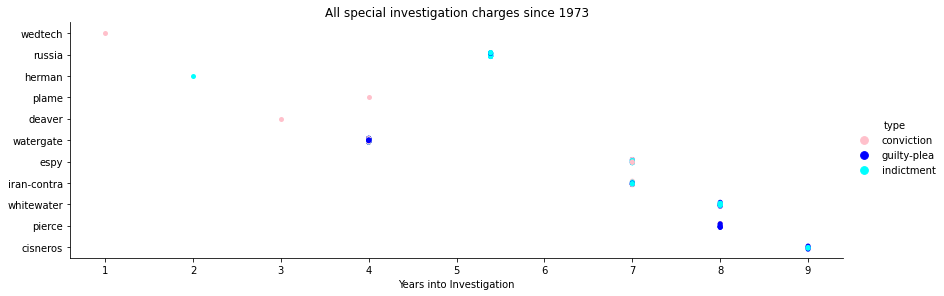

In [22]:
#graph replicated . I am missing the bar graph and a few other things, but I was able to combine everything I learned from this week along with the foundations of what we learned today
import matplotlib.pyplot as plt


sns.catplot(data = df, y='', x= 'Years into Investigation', hue='type', height= 4, aspect=3,palette=sns.color_palette(['pink', 'blue','#00FFFF']), order=['wedtech','russia','herman','plame','deaver','watergate','espy','iran-contra','whitewater','pierce','cisneros'])
plt.title('All special investigation charges since 1973')

In [23]:
df['name'].value_counts()

Maurice H. Stans       2
Eugenio R. Martinez    2
G. Gordon Liddy        2
Bernard L. Barker      2
David L. Parr          1
                      ..
Russian national 6     1
Raymond Abendroth      1
Joseph Fernandez       1
Lance H. Wilson        1
Konstantin Kilimnik    1
Name: name, Length: 177, dtype: int64

AttributeError: ignored

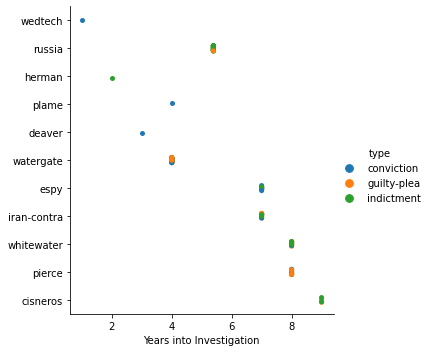

In [24]:
sns.catplot(data=df , y='', x='Years into Investigation', hue='type', 
            order=['wedtech','russia','herman','plame','deaver','watergate','espy','iran-contra','whitewater','pierce','cisneros']) 
sns.catplot.title("All special investigation charges since 1973")

In [0]:
sns.stripplot(x='investigation_length', y='investigation', data=df) #ignore 

In [0]:
#messing around with graphs 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

g = sns.pointplot(x="investigation_length", y='investigation', hue="type", 
                  ci=68.2,data=df, ax=ax)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
dt = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv', header=0)

In [36]:
dt.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [27]:
dt.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [30]:
df = df[['Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread','Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole',]]

KeyError: ignored